# Author:- MD.Hasibur Rahman Niloy
# Terrorism data analysis
## Data Science and Business Analytics

## Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin-1")
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Let's see the columns name

In [60]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## Processing the Dataset

### Merging the Year, month and day 

In [4]:
df=data[['iyear','imonth','iday']].copy()
df.columns=['year','month','day']
df=df. applymap(str) 
data['time']=pd.to_datetime(df[['year','month','day']], format='%Y%m%d', errors='coerce')
data['imonth']=data['imonth'].replace(0,np.nan)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,time
0,197000000001,1970,7.0,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02
1,197000000002,1970,NaN,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,NaT
2,197001000001,1970,1.0,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT
3,197001000002,1970,1.0,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT
4,197001000003,1970,1.0,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT


### First we will looks at info and description. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, eventid to time
dtypes: datetime64[ns](1), float64(56), int64(21), object(58)
memory usage: 148.3+ MB


### Missing Values

In [6]:
missing_data = data.isnull()
missing_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,time
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,False,False,False,False,False,True,False
1,False,False,True,False,True,False,True,False,False,False,...,True,True,True,False,False,False,False,False,True,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,False,False,False,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,False,False,False,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,False,False,False,False,False,True,True


### Finding mising values

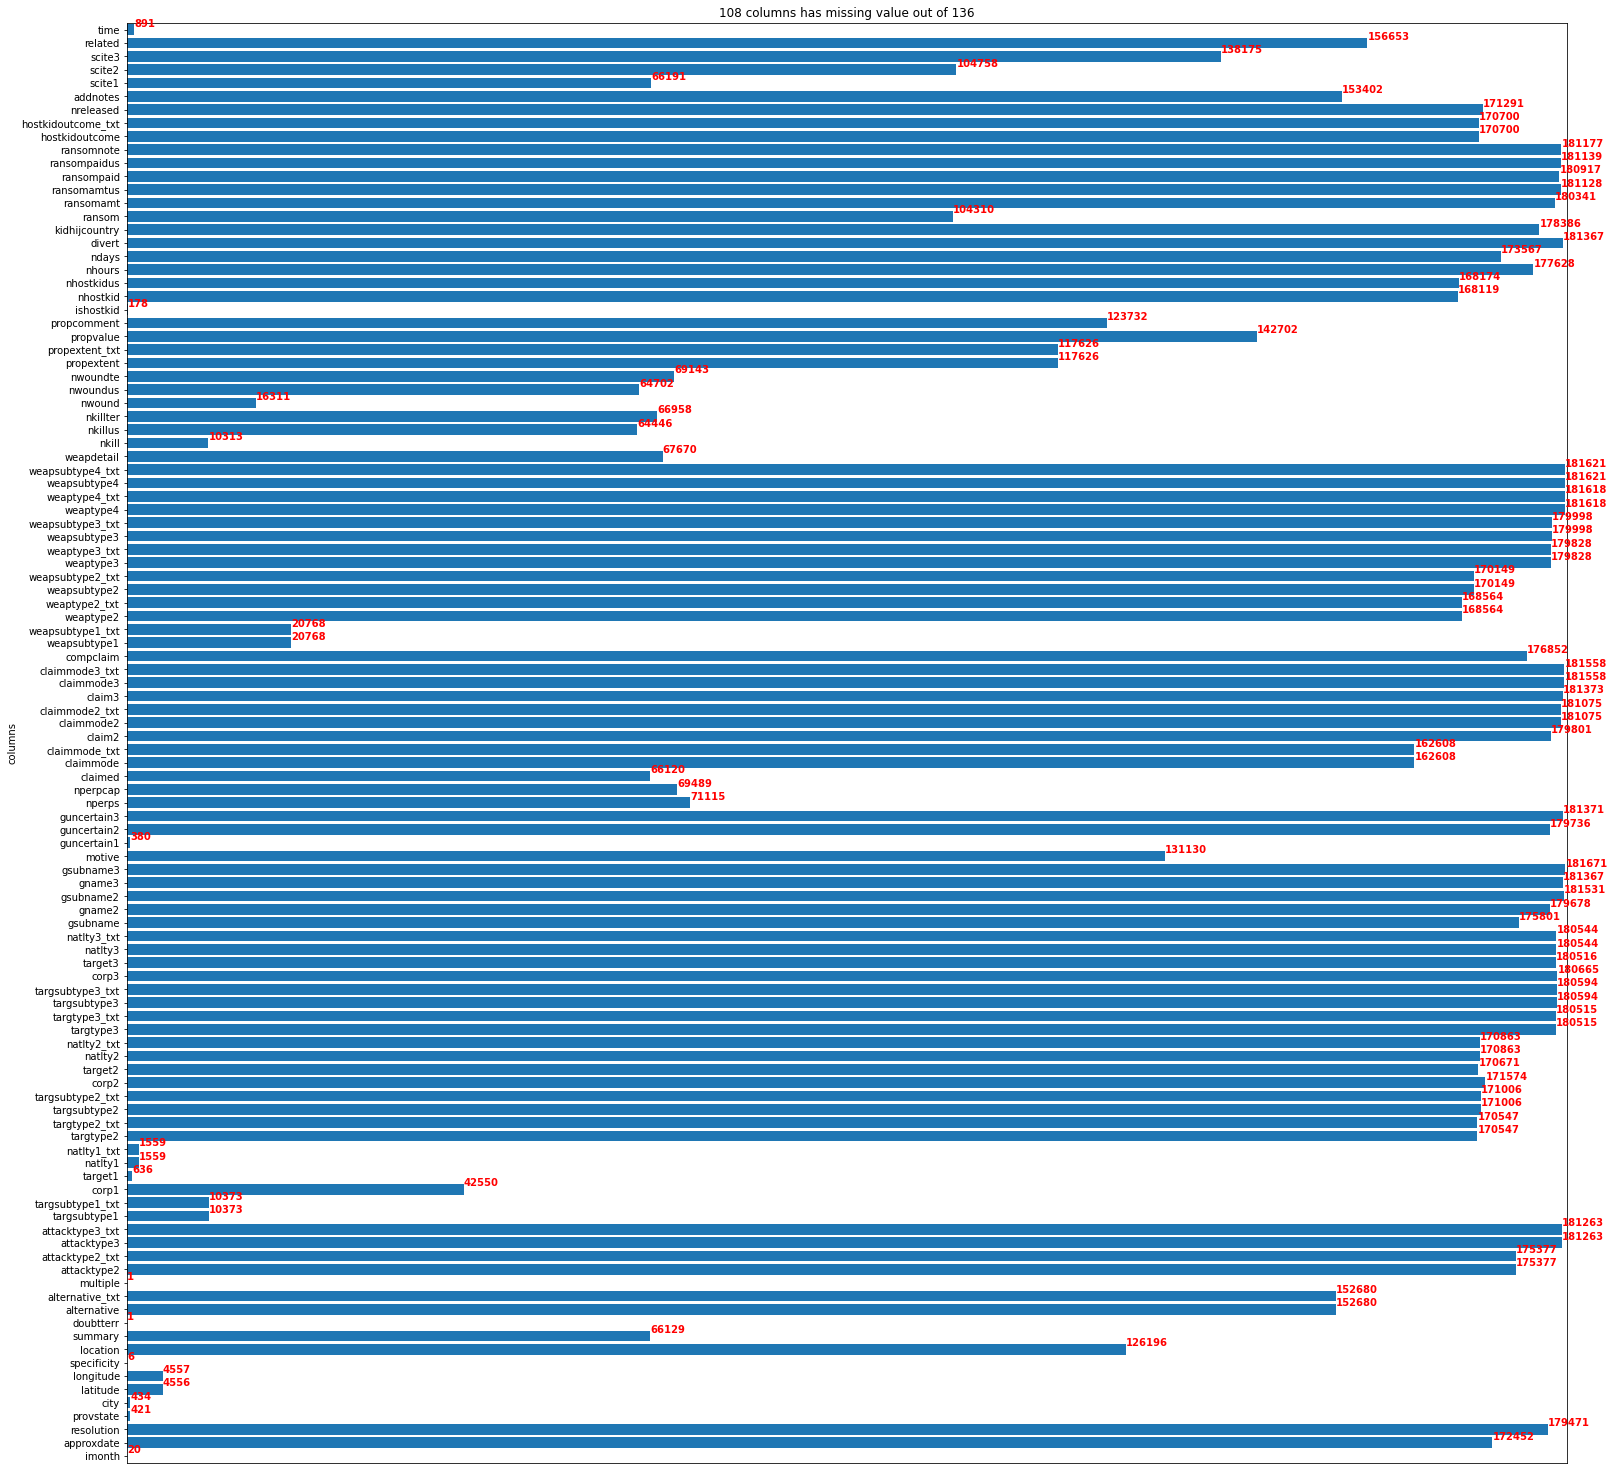

In [61]:
colm=[]
value=[]
for col in missing_data.columns.values.tolist():
    
    if missing_data[col].value_counts().shape==(2,):
        colm.append(col)
        value.append(missing_data[col].value_counts()[1])
fig1 = plt.figure(figsize=(20,20))
ax = fig1.add_axes([0,0,1,1])
ax.barh(colm,value)
ax.margins(0.001,0.001)
plt.xticks(rotation=90)
for i, v in enumerate(value):
    ax.text(v + 4, i + .25, str(v), color='red', fontweight='bold')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)  
ax.set_title('{} columns has missing value out of {}'.format(len(colm), data.shape[1]))
ax.set_ylabel("columns")
plt.show()


### It seems 107 columns has missing value.Since all data are not important to, so let's choose those valuable one.

### Before filtering let's get a statistical description of the data set

In [8]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181671.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467989,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.387810,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,1.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Correlation of the whole dataset

<AxesSubplot:>

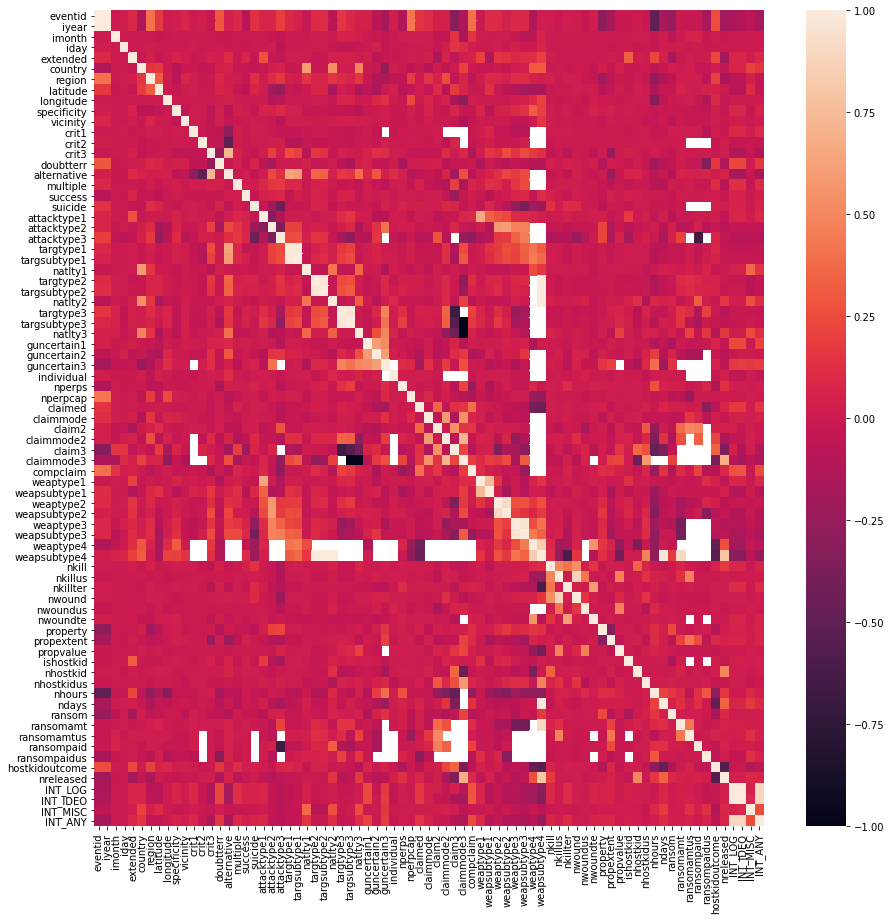

In [9]:
import seaborn as sns
corr=data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           ax=ax)

## Selecting column of interest

In [10]:

col=['iyear','imonth','iday','time','country_txt','region_txt','provstate','gname','city',
 'latitude',
 'longitude','attacktype1_txt','success','suicide','targtype1_txt','weaptype1_txt','nkill','nwound','ishostkid']
datanew=data[col]
datanew.head()

,iyear,imonth,iday,time,country_txt,region_txt,provstate,gname,city,latitude,longitude,attacktype1_txt,success,suicide,targtype1_txt,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7.0,2,1970-07-02,Dominican Republic,Central America & Caribbean,NaN,MANO-D,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Private Citizens & Property,Unknown,1.0,0.0,0.0
1,1970,NaN,0,NaT,Mexico,North America,Federal,23rd of September Communist League,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),1,0,Government (Diplomatic),Unknown,0.0,0.0,1.0
2,1970,1.0,0,NaT,Philippines,Southeast Asia,Tarlac,Unknown,Unknown,15.478598,120.599741,Assassination,1,0,Journalists & Media,Unknown,1.0,0.0,0.0
3,1970,1.0,0,NaT,Greece,Western Europe,Attica,Unknown,Athens,37.997490,23.762728,Bombing/Explosion,1,0,Government (Diplomatic),Explosives,NaN,NaN,0.0
4,1970,1.0,0,NaT,Japan,East Asia,Fukouka,Unknown,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,1,0,Government (Diplomatic),Incendiary,NaN,NaN,0.0


In [11]:
#Changing the name of header
dic={'iyear':'Year','imonth':'Month','iday':"day",'time':'Time','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound','ishostkid':'HostKid'}
datanew.rename(columns=dic,inplace=True)
datanew.head()

,Year,Month,day,Time,Country,Region,State,Group,City,latitude,longitude,Attacktype,success,suicide,Targettype,Weapon,kill,Wound,HostKid
0,1970,7.0,2,1970-07-02,Dominican Republic,Central America & Caribbean,NaN,MANO-D,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Private Citizens & Property,Unknown,1.0,0.0,0.0
1,1970,NaN,0,NaT,Mexico,North America,Federal,23rd of September Communist League,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),1,0,Government (Diplomatic),Unknown,0.0,0.0,1.0
2,1970,1.0,0,NaT,Philippines,Southeast Asia,Tarlac,Unknown,Unknown,15.478598,120.599741,Assassination,1,0,Journalists & Media,Unknown,1.0,0.0,0.0
3,1970,1.0,0,NaT,Greece,Western Europe,Attica,Unknown,Athens,37.997490,23.762728,Bombing/Explosion,1,0,Government (Diplomatic),Explosives,NaN,NaN,0.0
4,1970,1.0,0,NaT,Japan,East Asia,Fukouka,Unknown,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,1,0,Government (Diplomatic),Incendiary,NaN,NaN,0.0


## Adding Continent

In [12]:
datanew["Region"].unique()
datanew["Continent"]=datanew['Region'].map({'Central America & Caribbean':'America','North America':'America','Southeast Asia':'Asia',
'Western Europe':'Europe', 'East Asia':'Asia', 'South America':"America", 'Eastern Europe':'Europe',
       'Sub-Saharan Africa':'America', 'Middle East & North Africa':'Africa',
       'Australasia & Oceania':'Australia', 'South Asia':'Asia', 'Central Asia':'Asia'})
col=['Year','Month','day','Time','Country','Continent','Group','Region','State','City',
 'latitude',
 'longitude','Attacktype','success','suicide','Targettype','Weapon','kill','Wound','HostKid']
datanew=datanew.replace({'Hostage Taking (Kidnapping)':"Kidnapping",
       'Bombing/Explosion':'Bombing', 'Facility/Infrastructure Attack':'Infrastructure Attack'})
datanew=datanew[col]
datanew.head()

,Year,Month,day,Time,Country,Continent,Group,Region,State,City,latitude,longitude,Attacktype,success,suicide,Targettype,Weapon,kill,Wound,HostKid
0,1970,7.0,2,1970-07-02,Dominican Republic,America,MANO-D,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Private Citizens & Property,Unknown,1.0,0.0,0.0
1,1970,NaN,0,NaT,Mexico,America,23rd of September Communist League,North America,Federal,Mexico city,19.371887,-99.086624,Kidnapping,1,0,Government (Diplomatic),Unknown,0.0,0.0,1.0
2,1970,1.0,0,NaT,Philippines,Asia,Unknown,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1,0,Journalists & Media,Unknown,1.0,0.0,0.0
3,1970,1.0,0,NaT,Greece,Europe,Unknown,Western Europe,Attica,Athens,37.997490,23.762728,Bombing,1,0,Government (Diplomatic),Explosives,NaN,NaN,0.0
4,1970,1.0,0,NaT,Japan,Asia,Unknown,East Asia,Fukouka,Fukouka,33.580412,130.396361,Infrastructure Attack,1,0,Government (Diplomatic),Incendiary,NaN,NaN,0.0


## Our dataset is ready to explore


## Exploring dataset

### Let's take a overview of the new dataset correlation

<AxesSubplot:>

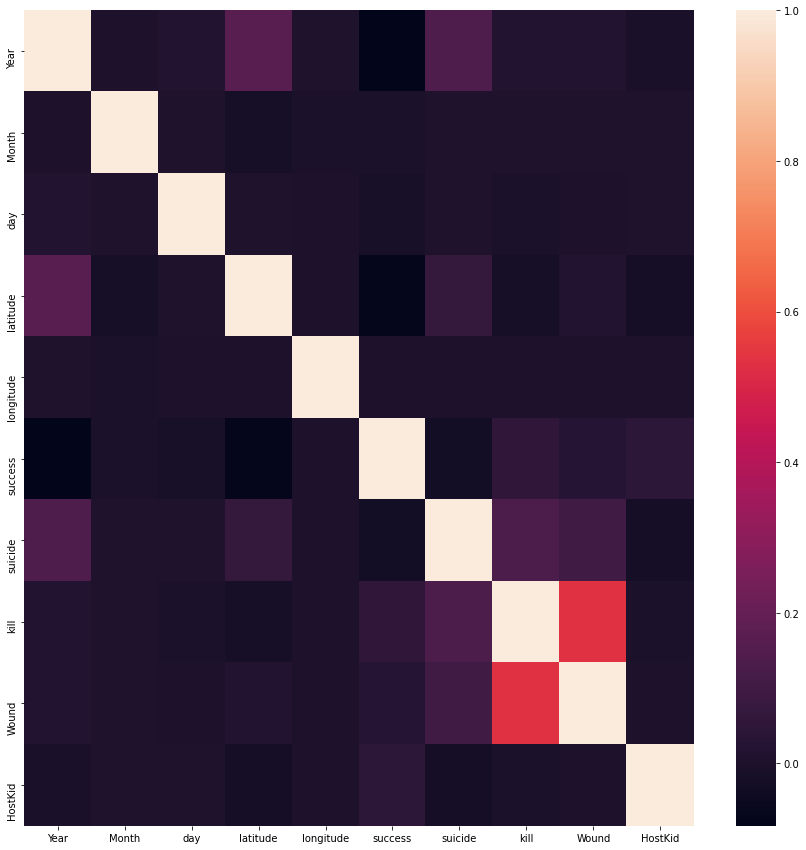

In [13]:

fig, ax2 = plt.subplots(figsize=(15,15))
sns.heatmap(datanew.corr(), 
        xticklabels=datanew.corr().columns,
        yticklabels=datanew.corr().columns,
           ax=ax2)

### Let's see the distribution

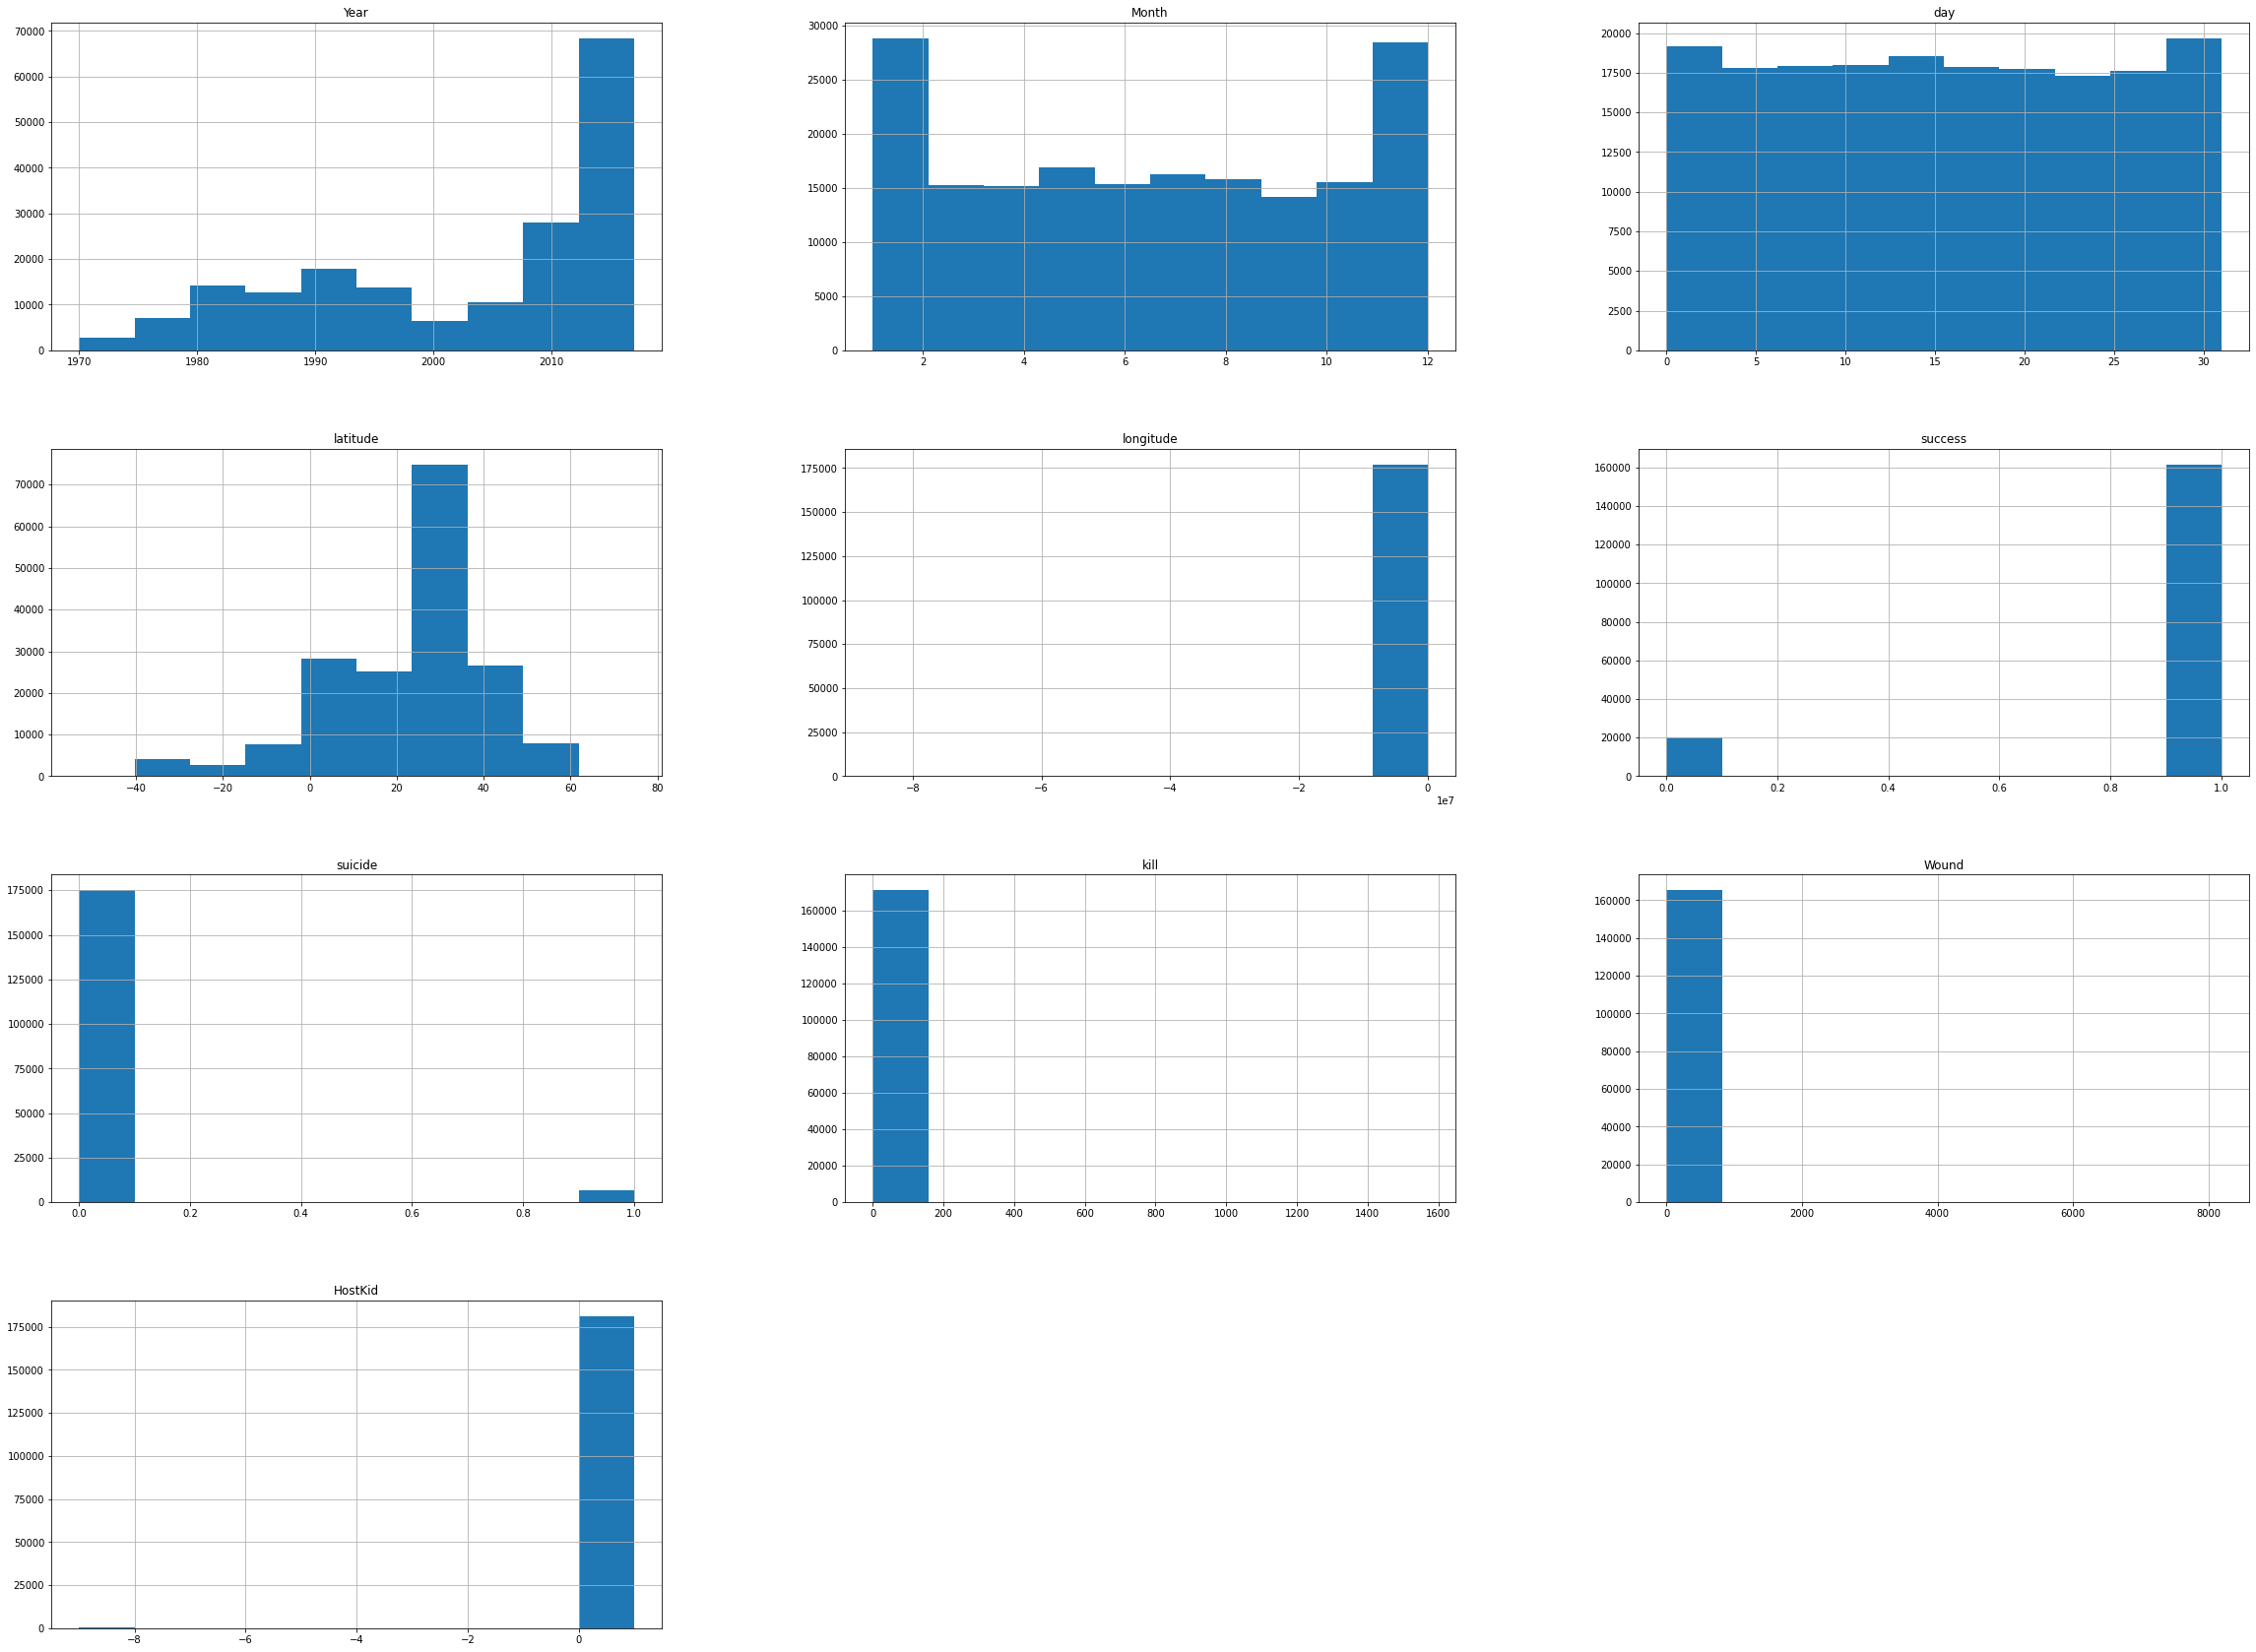

In [14]:
fig, ax3 = plt.subplots(figsize=(40,30))
datanew.hist(ax=ax3);



### How much people get kill each year due to attack in ?

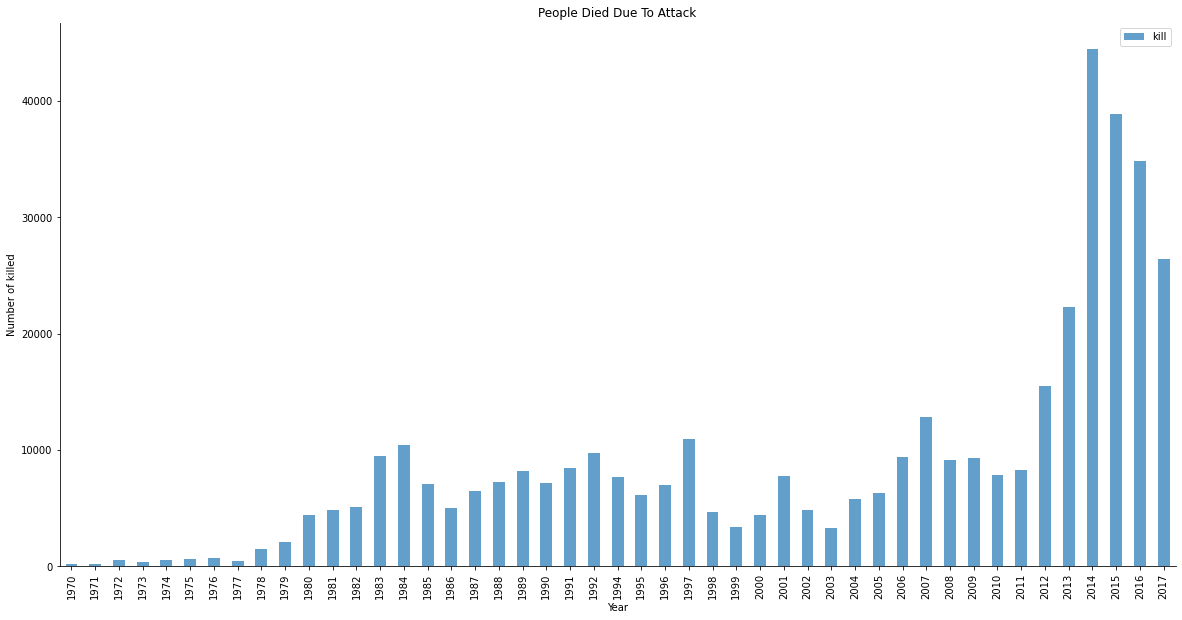

In [15]:
df=datanew[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
ax4.set_title("People Died Due To Attack")
plt.ylabel("Number of killed")
plt.xlabel('Year')
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

It seems like terrorists attack increased after 2011.<br/><br/><br/>
### The proportion of attack based on continent

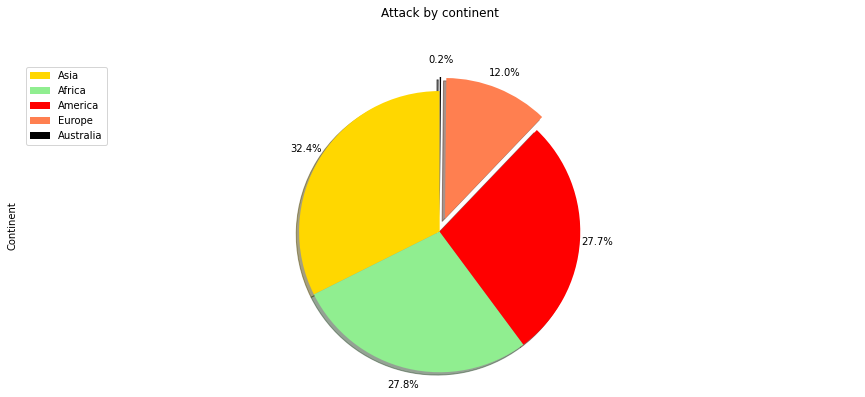

In [16]:
colors_list = ['gold', 'lightgreen',  'red','coral', 'black']
explode_list = [0., 0, 0, 0.1, 0.1]

datanew['Continent'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list, 
                            explode=explode_list
                            )
plt.title('Attack by continent', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=datanew['Continent'].value_counts().index, loc='upper left') 

plt.show()


Except Australia,all other continent are effected heavily.Among them <b>Asia<b/> have attacked much more.   

### Let's watch the terrorist activities by region

Text(0, 0.5, 'Number of attack')

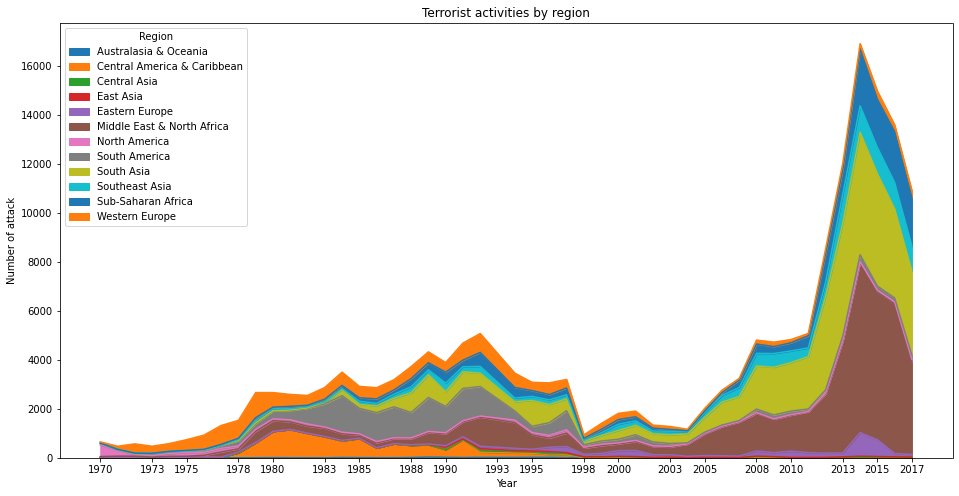

In [17]:
pd.crosstab(datanew.Year,datanew.Region).plot(kind="area",figsize=(16,8))
plt.xticks(np.ceil(np.linspace(datanew['Year'].min(),datanew['Year'].max(),20)))
plt.title("Terrorist activities by region")
plt.ylabel("Number of attack")

### Western Europe, South Asia, Southeast Asia has highest terrorist activities.<br/><br/><br/>
### Let's count's the attack each year

Text(0.5, 1.0, 'Attack per year')

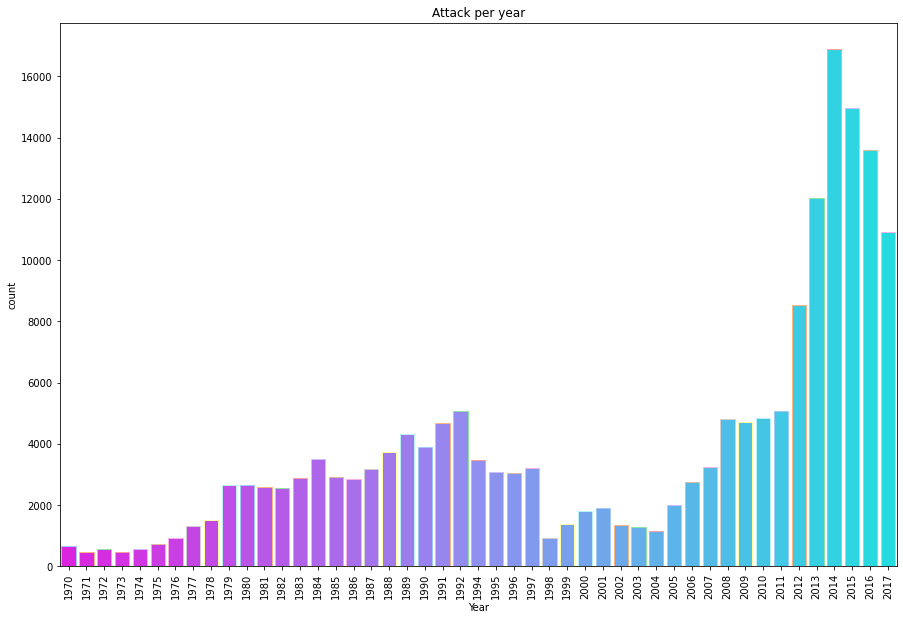

In [18]:
plt.subplots(figsize=(15,10))
sns.countplot("Year",data=datanew,palette="cool_r",edgecolor=sns.color_palette("pastel",10));
plt.xticks(rotation=90)
plt.title("Attack per year")


### The maximum number of attack occured in between 2012-2017
### Attack increased

In [19]:
a=datanew["Year"].value_counts().to_dict()
print("The number of attack increased since 1970 to 2017 is {}%".format(np.round(((a[2017]-a[1970])/a[2017]) *100)))

The number of attack increased since 1970 to 2017 is 94.0%


### Let's findout 10 city effected most

Text(0.5, 1.0, 'Top 10 effected city')

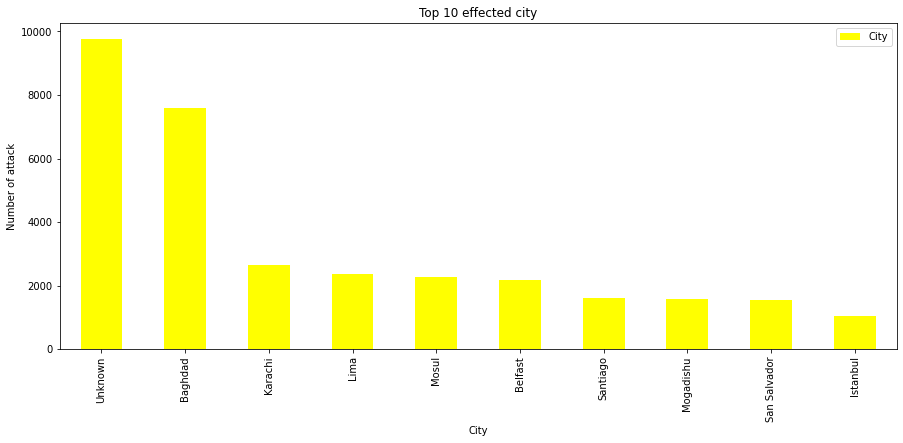

In [20]:
datanew['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(15,6),color="Yellow")
plt.xlabel("City")
plt.ylabel("Number of attack")
plt.title("Top 10 effected city")

### We get one unknown entry. Except that Baghadad has faced 7589 times attack since 1970-2017.

### What were types of attack?

<AxesSubplot:>

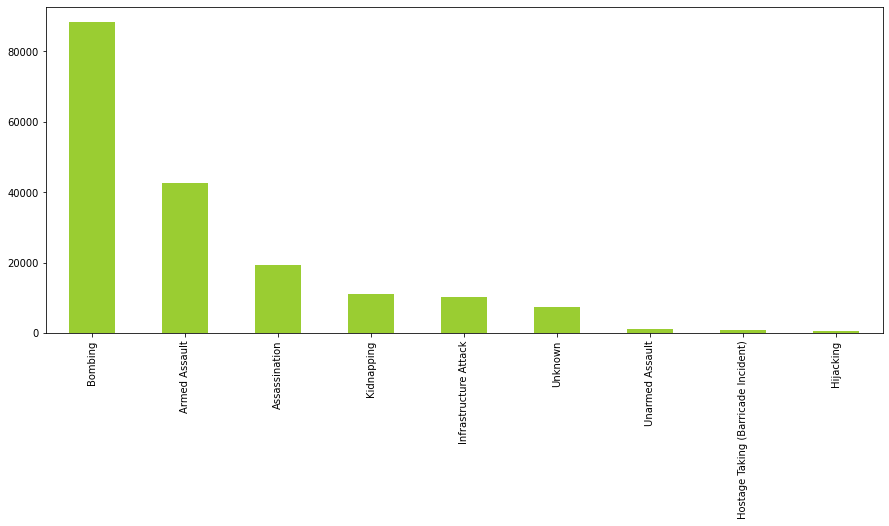

In [21]:
datanew['Attacktype'].value_counts().plot(kind='bar',figsize=(15,6),color="Yellowgreen")

### Bombing are mostly used.
### Let's see how many people get killed since 1970-2017 due to Bombing

Text(0.5, 0, 'Attack types')

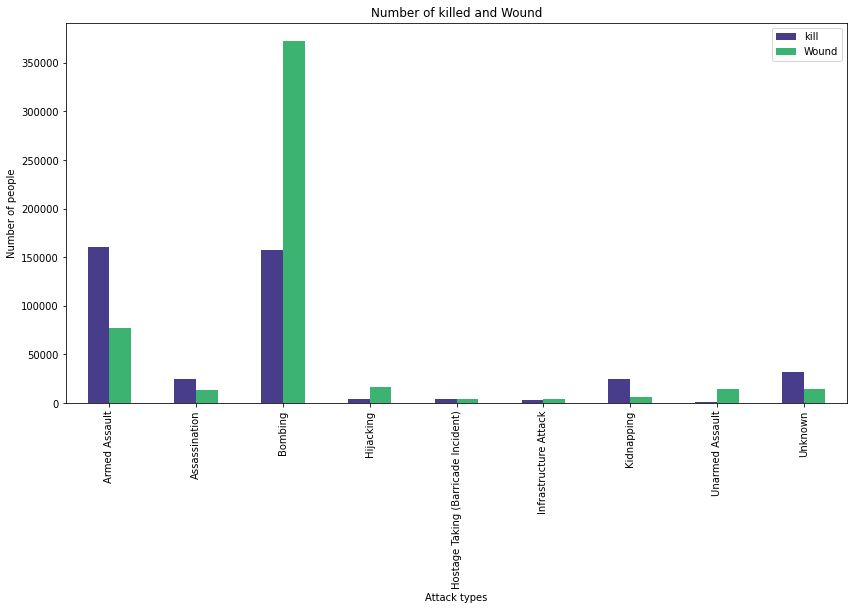

In [22]:
datanew[['Attacktype','kill','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(14,7),color=['darkslateblue', 'mediumseagreen'])
plt.title("Number of killed and Wound")
plt.ylabel('Number of people')
plt.xlabel('Attack types')

### Armed Assault killed people slightly more than bombing,<br/>but bombing make people more injured.

### In which country people get killed most?

In [23]:
datanew[['Country','kill']].groupby(['Country'],axis=0).sum().sort_values('kill',ascending=False).head(1).reset_index().iloc[0,:].to_dict()

{'Country': 'Iraq', 'kill': 78589.0}

### So 78569 people died in Iraq due to terrorist attack.
### What was the target?

Text(0.5, 1.0, 'Attack per year')

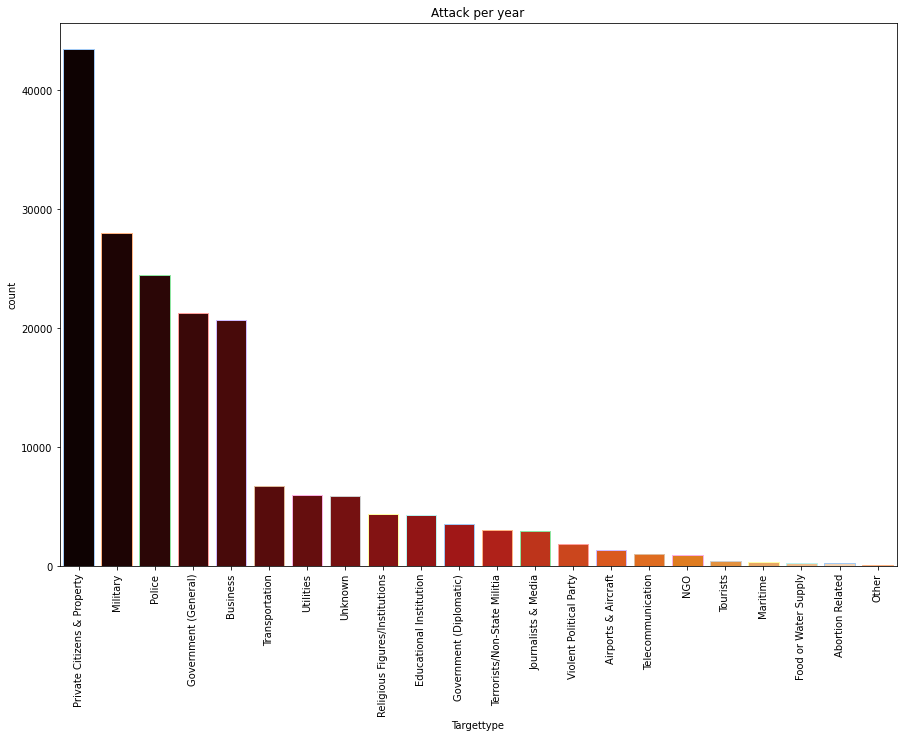

In [24]:
plt.subplots(figsize=(15,10))
sns.countplot(datanew["Targettype"],order=datanew['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("pastel",10));
plt.xticks(rotation=90)
plt.title("Attack per year")


### Privet Citizens & Property are attacked most by terrorist than others people

Let's see the attack on globe

In [25]:
df=datanew.groupby(['Country'],as_index=False).count()

In [26]:
fig=px.choropleth(df,locations='Country',locationmode="country names",color='Year',hover_name='Country',projection='orthographic',title="Acttack Since 1970-2017",labels={'Year':'Attack'})
fig.show()

### Top 10 terrorist Group and the attacked number?

<AxesSubplot:xlabel='Group'>

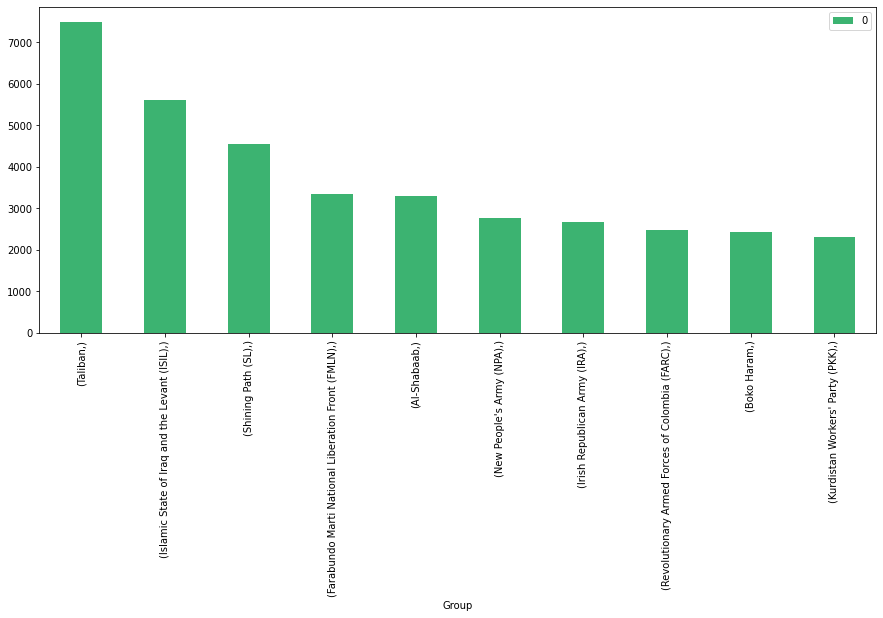

In [27]:
datanew[['Group']].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='mediumseagreen',figsize=(15,6))

### Taliban attacked most then others.<br/>
### Number of people killed by Top 10 Groups

<AxesSubplot:xlabel='Group'>

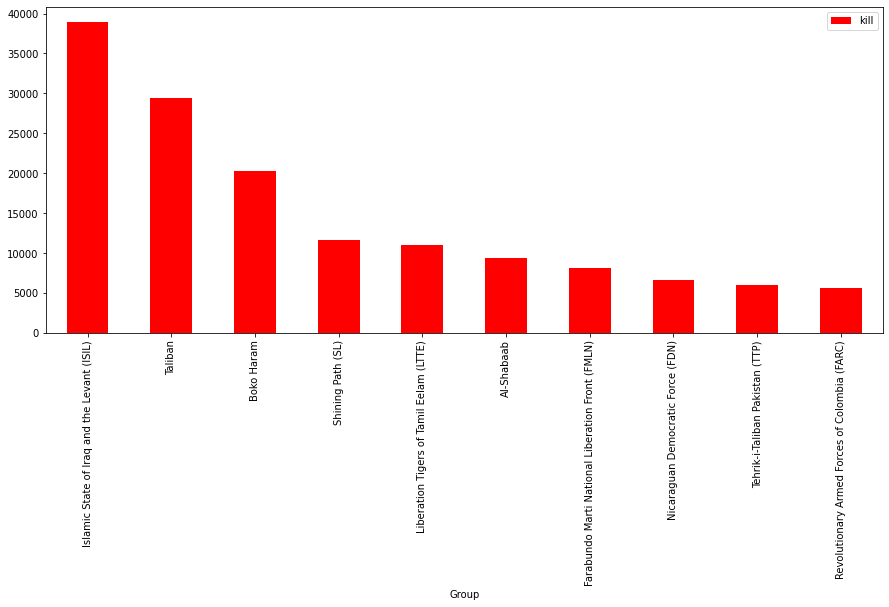

In [28]:
datanew[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(15,6))

### Most people killed by ISIL

In [46]:
df=datanew[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


### So here we can see that which group attacked which country most
### Let's watch it on map with the number of kills

In [58]:
world_map = folium.Map(location=[0, 0], zoom_start=8)
folium.Choropleth(geo_data='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json', name='choropleth',
    data=df,
    columns=['Country','kill'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of people'
).add_to(world_map)
folium.LayerControl().add_to(world_map)
world_map